# 라이브러리 불러오기

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [7]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [9]:
file_path = "../data/indexPrice.parquet"
df = pd.read_parquet(file_path)
df.shape

(2220, 28)

In [10]:
df.head(3)

,연_월_일,시가KOSPI200,고가KOSPI200,저가KOSPI200,종가KOSPI200,종가_대비KOSPI200,등락률KOSPI200,거래량KOSPI200,거래대금KOSPI200,상장시가총액KOSPI200,시가_KOSPI200ESG,고가_KOSPI200ESG,저가_KOSPI200ESG,종가_KOSPI200ESG,종가_대비_KOSPI200ESG,등락률_KOSPI200ESG,거래량_KOSPI200ESG,거래대금_KOSPI200ESG,상장시가총액_KOSPI200ESG,연,분기,월,연_분기,연_월,분기_월,연_분기_월,일,월_일
0,2018-12-28,261.5,262.75,261.25,262.0,1.410156,0.540039,62701.0,2895636.0,1.165450e+09,272.25,273.75,272.00,272.75,1.589844,0.589844,48040.0,1996651.0,922911424.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,28,12-28
1,2018-12-27,261.5,261.75,259.75,260.5,-0.409912,-0.160034,84457.0,4081822.0,1.158683e+09,272.00,272.50,270.25,271.00,-0.729980,-0.270020,64008.0,2660684.0,917445376.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,27,12-27
2,2018-12-26,261.0,262.50,259.25,261.0,-3.470703,-1.309570,92493.0,4372646.0,1.161841e+09,272.75,274.00,270.75,271.75,-4.488281,-1.620117,70175.0,2784379.0,920513728.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,26,12-26


In [11]:
df.tail(3)

,연_월_일,시가KOSPI200,고가KOSPI200,저가KOSPI200,종가KOSPI200,종가_대비KOSPI200,등락률KOSPI200,거래량KOSPI200,거래대금KOSPI200,상장시가총액KOSPI200,시가_KOSPI200ESG,고가_KOSPI200ESG,저가_KOSPI200ESG,종가_KOSPI200ESG,종가_대비_KOSPI200ESG,등락률_KOSPI200ESG,거래량_KOSPI200ESG,거래대금_KOSPI200ESG,상장시가총액_KOSPI200ESG,연,분기,월,연_분기,연_월,분기_월,연_분기_월,일,월_일
2217,2010-01-06,223.875,225.000,223.500,224.625,1.830078,0.819824,170500.0,5175271.0,781006720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,2010-1,2010-1,1-1,2010-1-1,6,1-6
2218,2010-01-05,224.250,224.375,222.125,222.875,-0.649902,-0.290039,153282.0,5730882.0,774237568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,2010-1,2010-1,1-1,2010-1-1,5,1-5
2219,2010-01-04,221.625,223.500,221.625,223.500,1.629883,0.729980,85967.0,3523480.0,777079104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,1,1,2010-1,2010-1,1-1,2010-1-1,4,1-4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   연_월_일               2220 non-null   datetime64[ns]
 1   시가KOSPI200          2220 non-null   float32       
 2   고가KOSPI200          2220 non-null   float32       
 3   저가KOSPI200          2220 non-null   float32       
 4   종가KOSPI200          2220 non-null   float32       
 5   종가_대비KOSPI200       2220 non-null   float32       
 6   등락률KOSPI200         2220 non-null   float32       
 7   거래량KOSPI200         2220 non-null   float32       
 8   거래대금KOSPI200        2220 non-null   float32       
 9   상장시가총액KOSPI200      2220 non-null   float32       
 10  시가_KOSPI200ESG      4 non-null      float32       
 11  고가_KOSPI200ESG      4 non-null      float32       
 12  저가_KOSPI200ESG      4 non-null      float32       
 13  종가_KOSPI200ESG      1721 non-null   float32     

# 시각화

## 상관관계

In [13]:
corr = df.corr()

In [14]:
mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

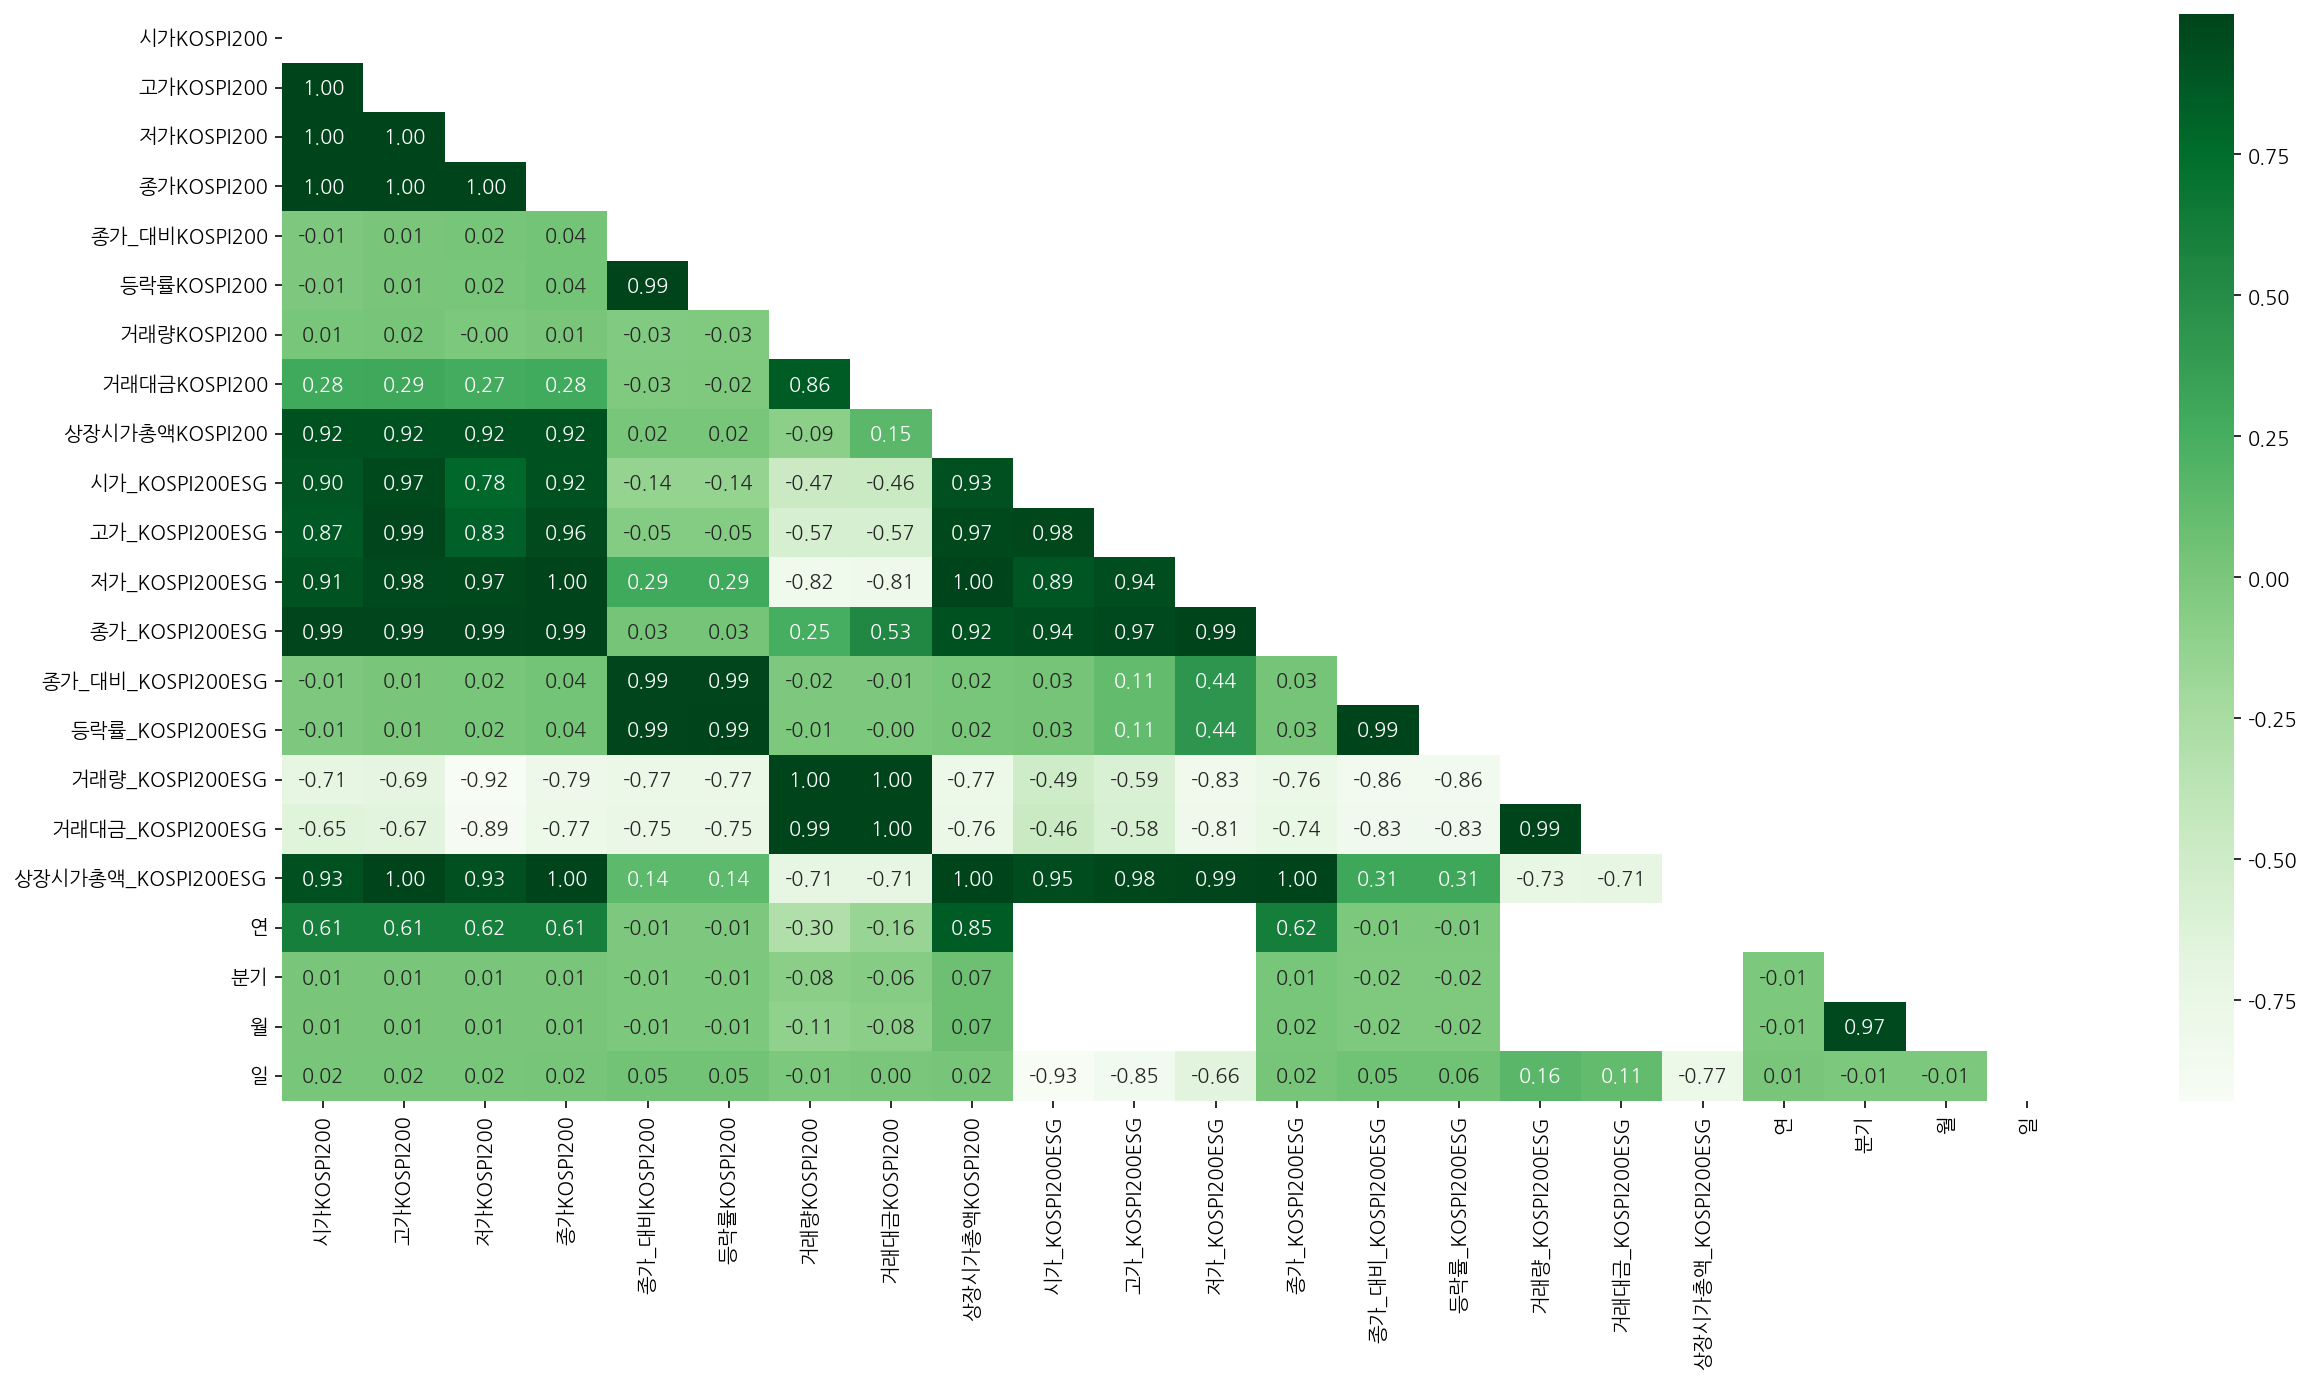

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr ,annot=True ,fmt='.2f' , cmap='Greens' ,mask=mask)

## 수치변수 히스토그램

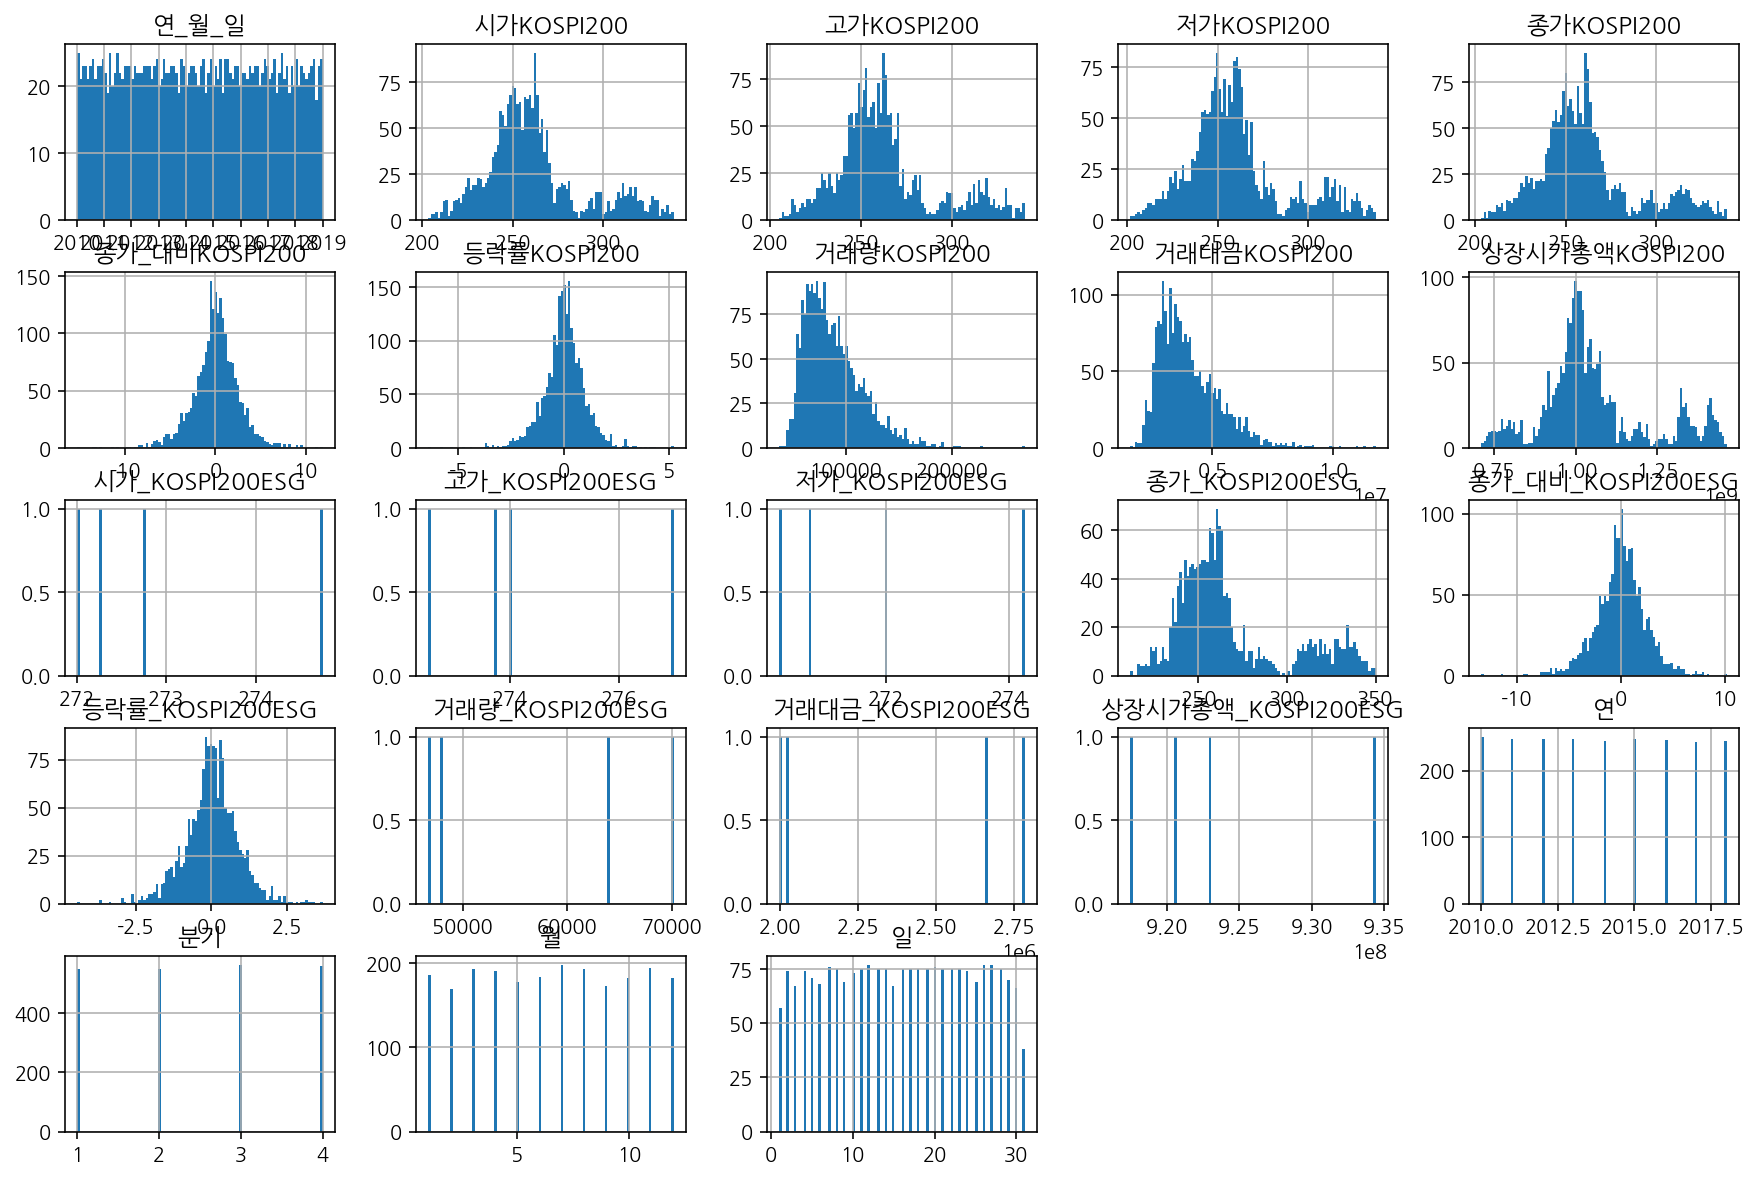

In [16]:
df.hist(bins=100, figsize=(15, 10));

## 종가

In [17]:
df["종가_대비KOSPI200"].isnull().sum()

0

In [18]:
df["종가_대비_KOSPI200ESG"].isnull().sum()

500

### 연_월_일

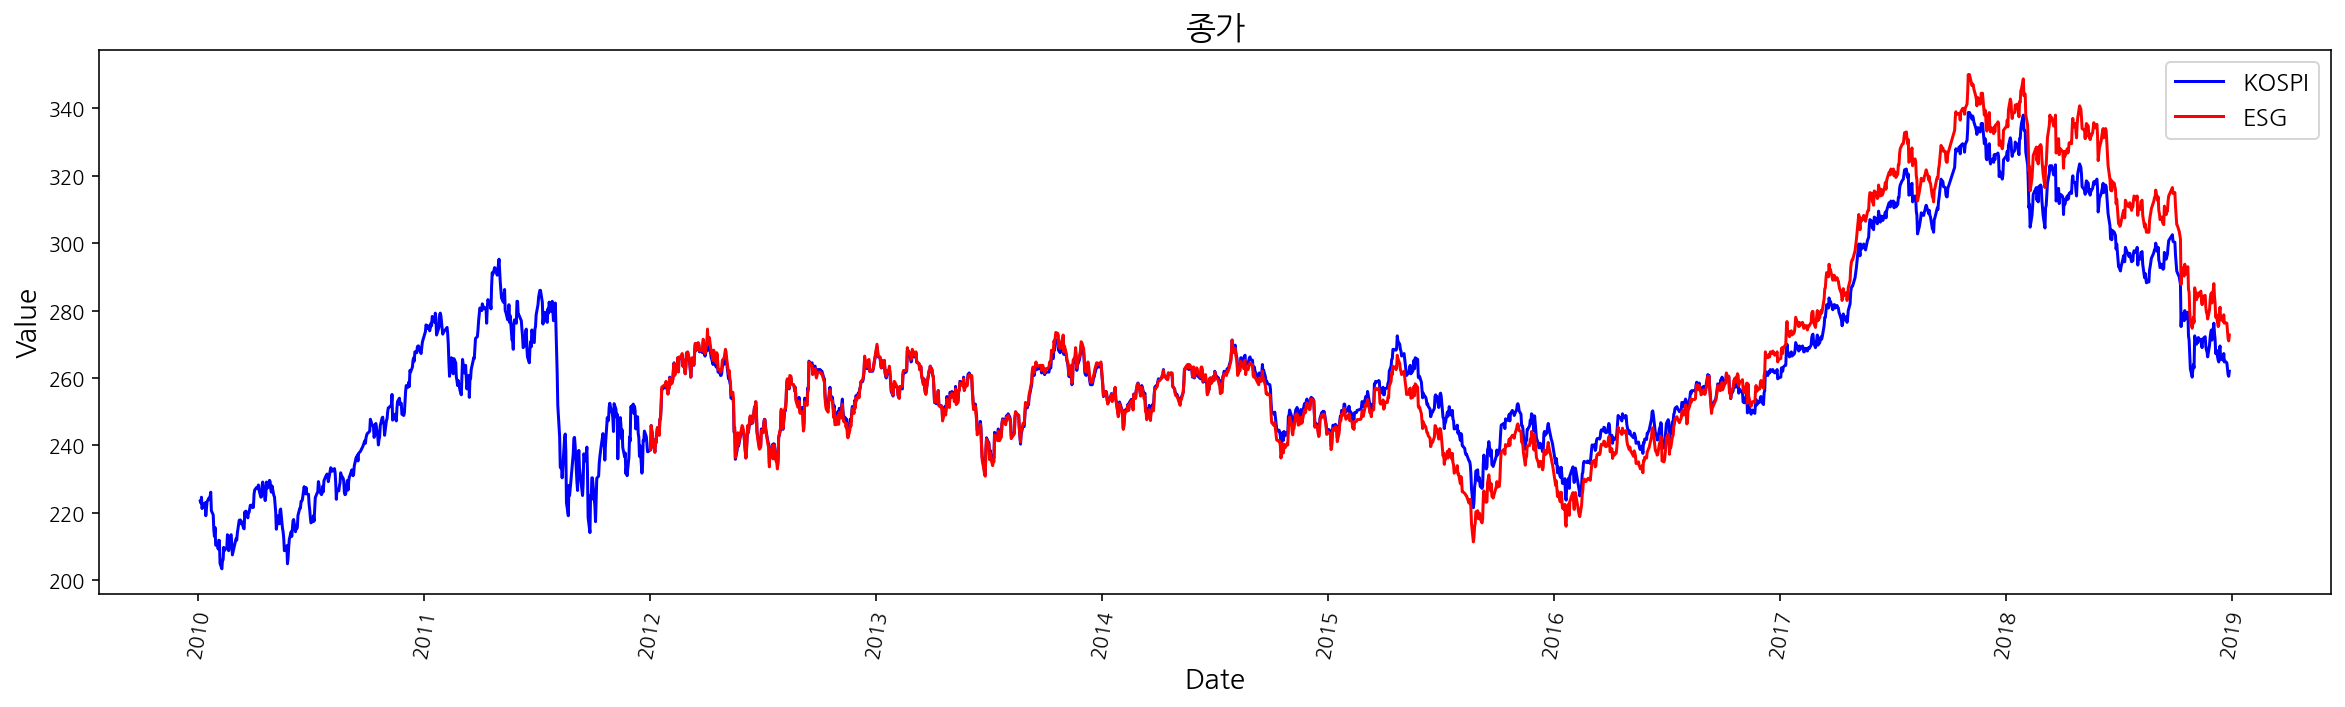

In [19]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월_일", y="종가KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월_일", y="종가_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('종가', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

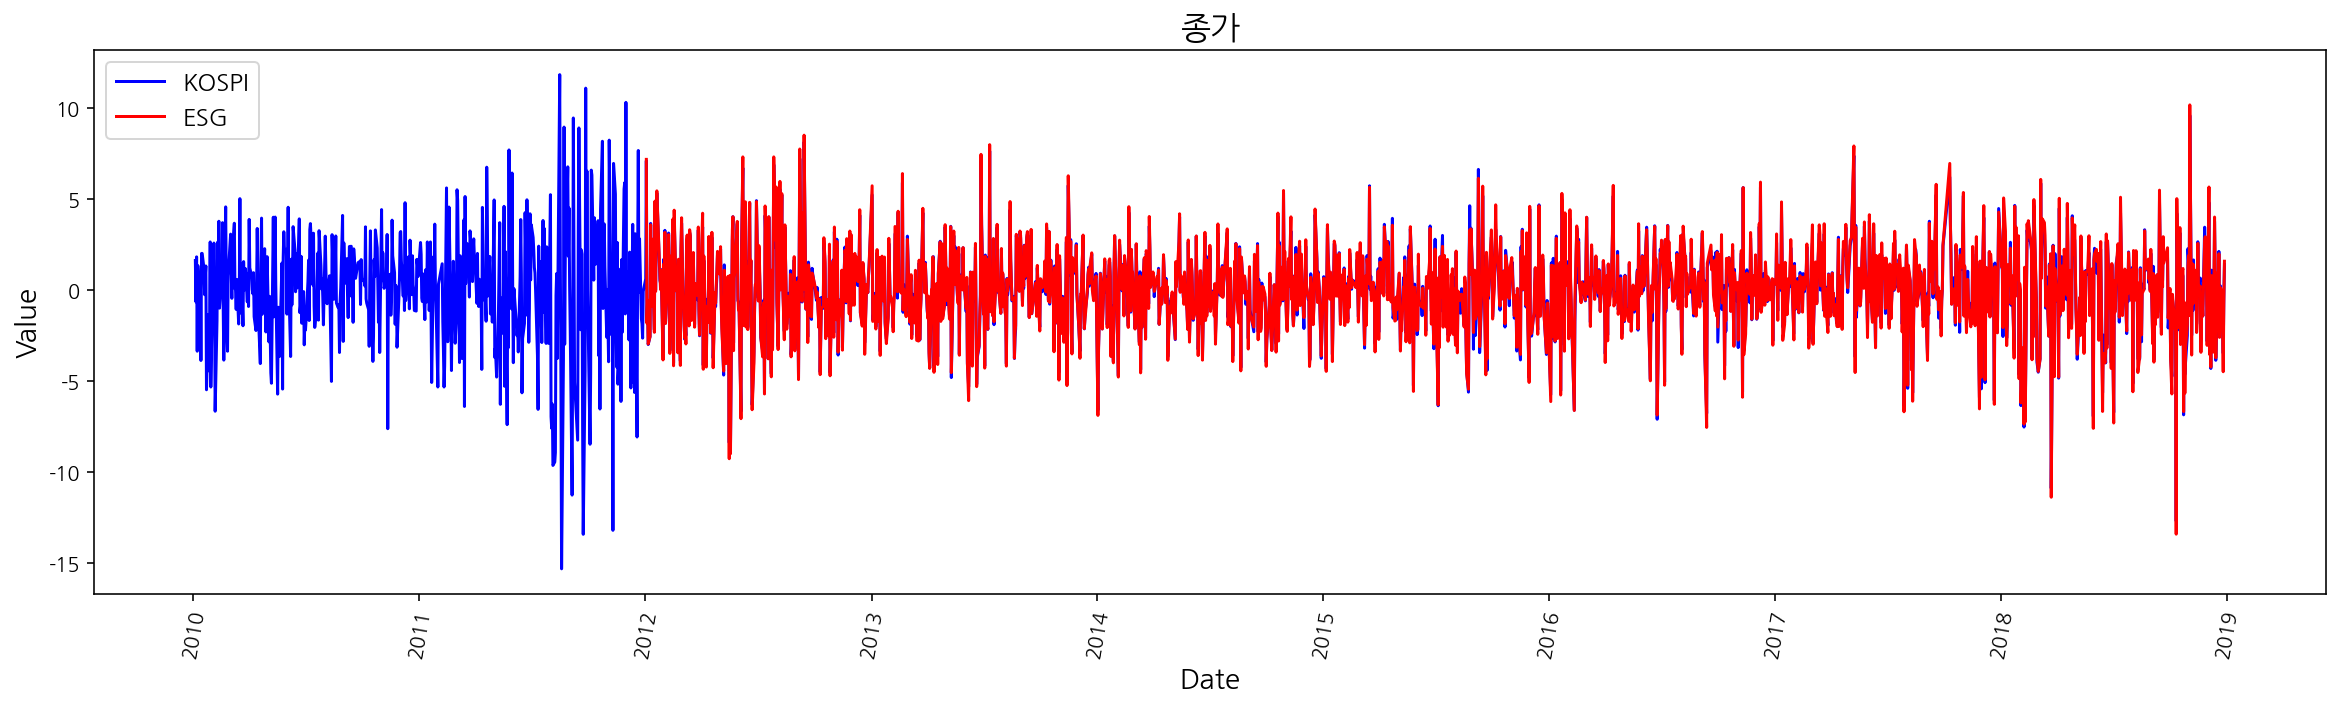

In [20]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월_일", y="종가_대비KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월_일", y="종가_대비_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('종가', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

### 연_월

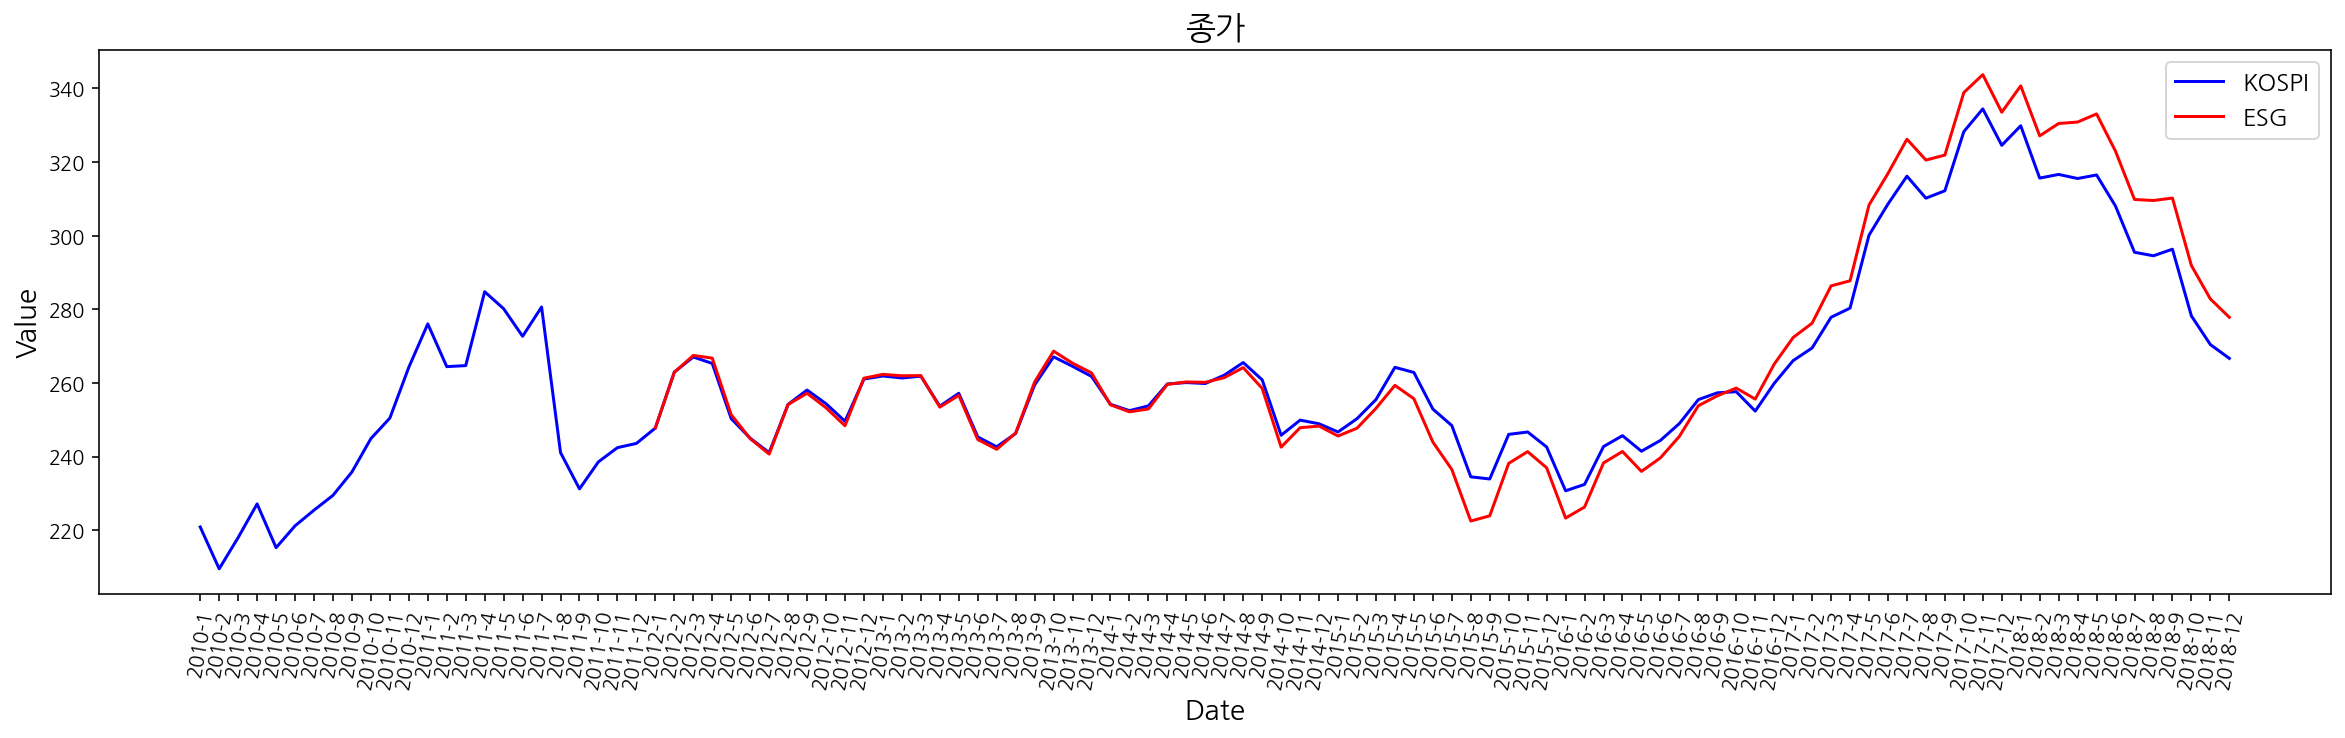

In [21]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="종가KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="종가_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('종가', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

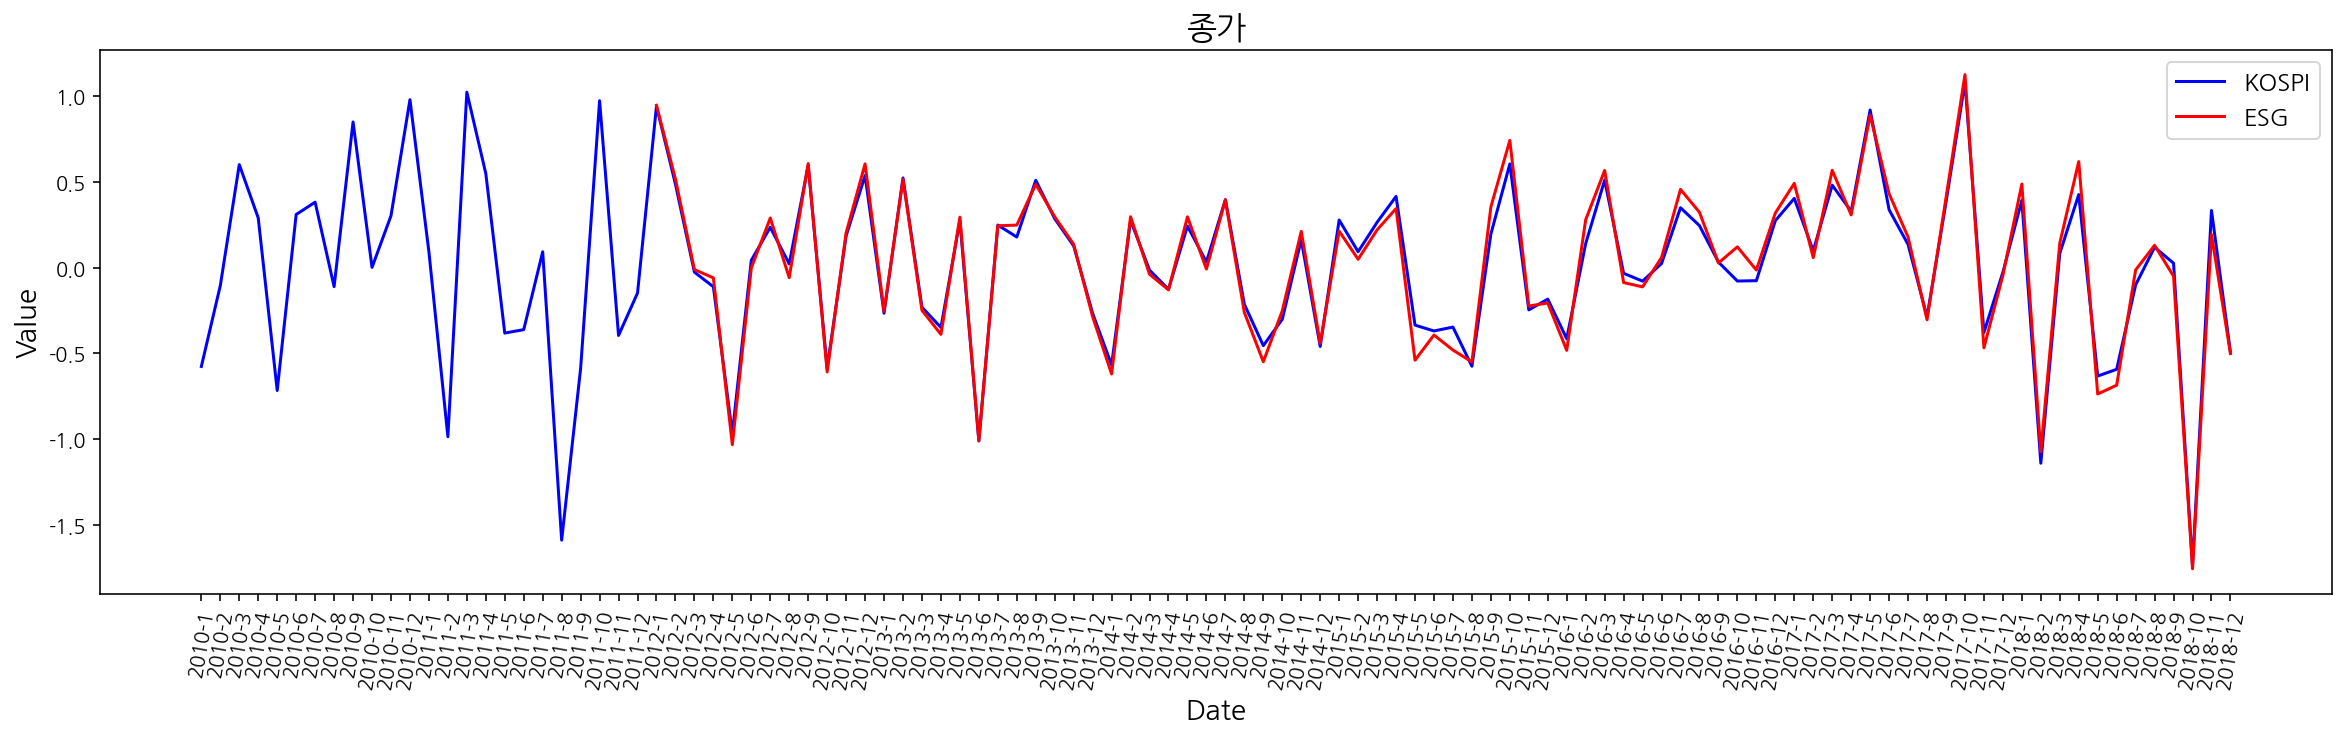

In [22]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="종가_대비KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="종가_대비_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('종가', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

## 거래량

In [23]:
df["거래량KOSPI200"].isnull().sum()

0

In [24]:
df["거래량_KOSPI200ESG"].isnull().sum()

2216

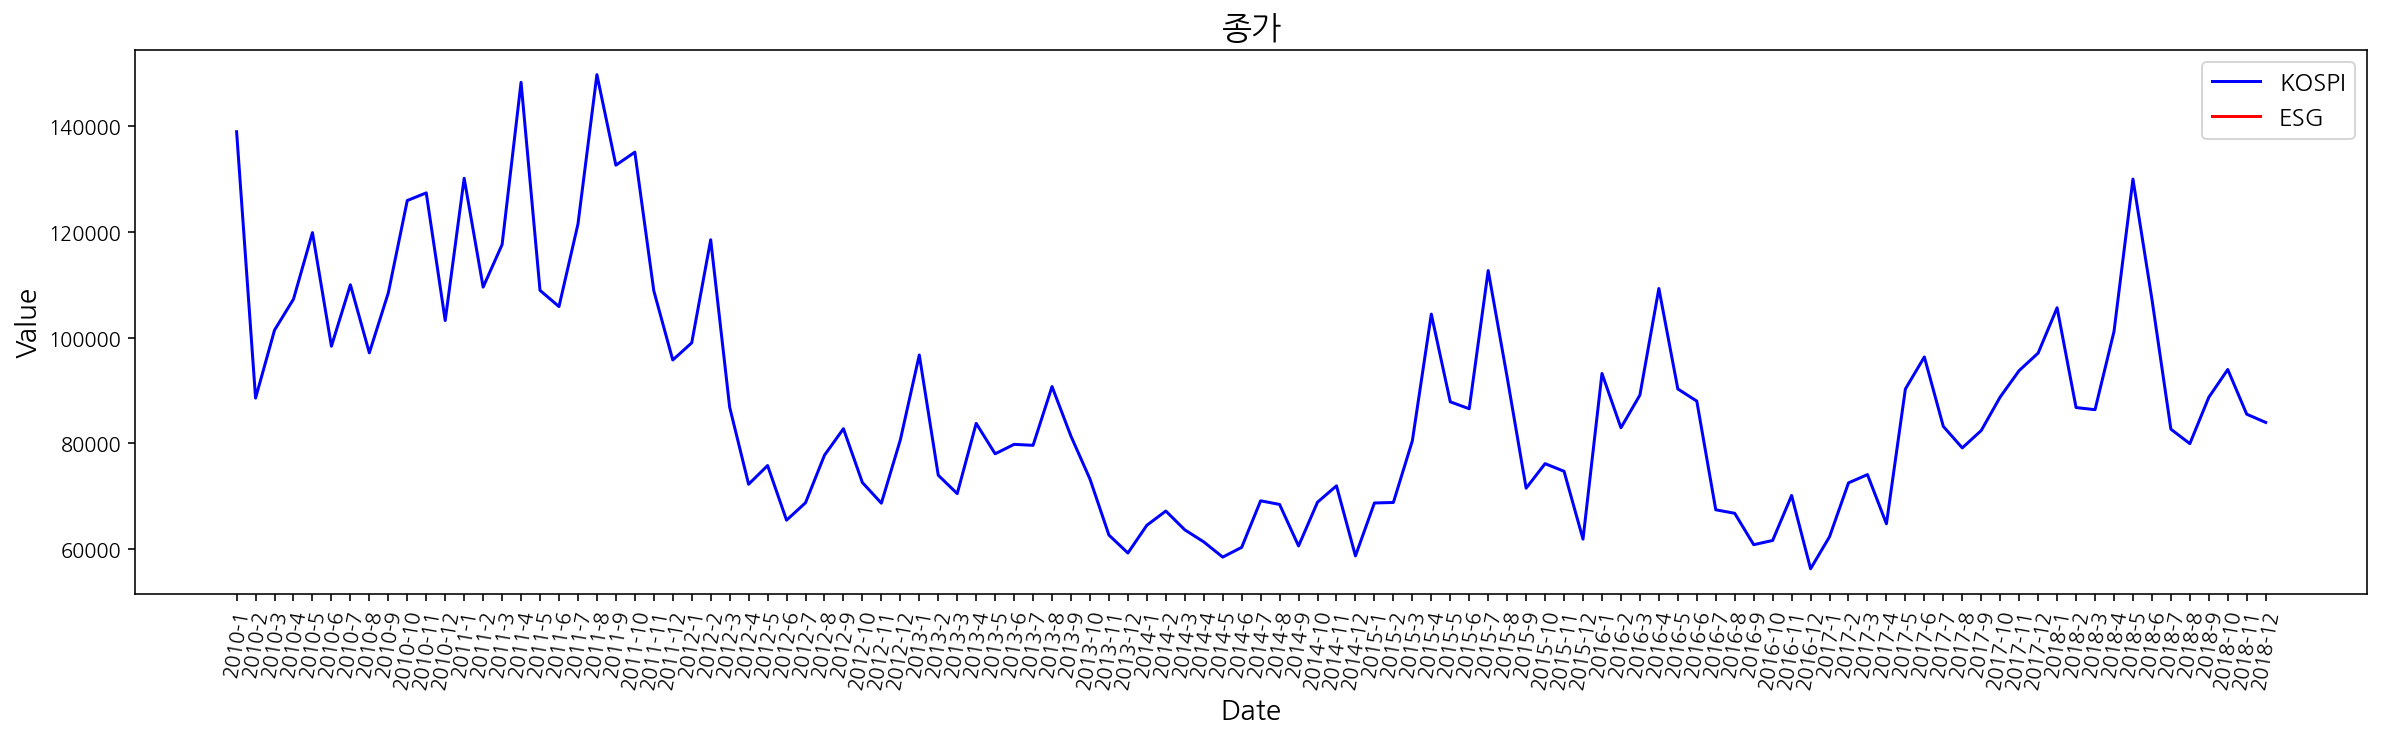

In [36]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="거래량KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="거래량_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('종가', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

### 연도

In [25]:
fig = px.bar(df, x="연", y="거래량KOSPI200")
fig.show()

In [26]:
fig = px.bar(df, x="연", y="거래량_KOSPI200ESG")
fig.show()

## 거래대금

In [27]:
df["거래대금KOSPI200"].isnull().sum()

0

In [28]:
df["거래대금_KOSPI200ESG"].isnull().sum()

2216

In [29]:
df[~df["거래대금_KOSPI200ESG"].isnull()]

,연_월_일,시가KOSPI200,고가KOSPI200,저가KOSPI200,종가KOSPI200,종가_대비KOSPI200,등락률KOSPI200,거래량KOSPI200,거래대금KOSPI200,상장시가총액KOSPI200,시가_KOSPI200ESG,고가_KOSPI200ESG,저가_KOSPI200ESG,종가_KOSPI200ESG,종가_대비_KOSPI200ESG,등락률_KOSPI200ESG,거래량_KOSPI200ESG,거래대금_KOSPI200ESG,상장시가총액_KOSPI200ESG,연,분기,월,연_분기,연_월,분기_월,연_분기_월,일,월_일
0,2018-12-28,261.5,262.75,261.25,262.0,1.410156,0.540039,62701.0,2895636.0,1.165450e+09,272.25,273.75,272.00,272.75,1.589844,0.589844,48040.0,1996651.0,922911424.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,28,12-28
1,2018-12-27,261.5,261.75,259.75,260.5,-0.409912,-0.160034,84457.0,4081822.0,1.158683e+09,272.00,272.50,270.25,271.00,-0.729980,-0.270020,64008.0,2660684.0,917445376.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,27,12-27
2,2018-12-26,261.0,262.50,259.25,261.0,-3.470703,-1.309570,92493.0,4372646.0,1.161841e+09,272.75,274.00,270.75,271.75,-4.488281,-1.620117,70175.0,2784379.0,920513728.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,26,12-26
3,2018-12-24,263.5,265.00,263.00,264.5,-0.609863,-0.229980,61962.0,2930704.0,1.176009e+09,274.75,277.00,274.25,276.25,-0.059998,-0.020004,46698.0,2025262.0,934401856.0,2018,4,12,2018-4,2018-12,4-12,2018-4-12,24,12-24


In [30]:
fig = px.bar(df, x="연", y="거래대금KOSPI200")
fig.show()

In [31]:
fig = px.bar(df, x="연", y="거래량_KOSPI200ESG")
fig.show()

## 등락률

In [32]:
df["등락률KOSPI200"].isnull().sum()

0

In [33]:
df["등락률_KOSPI200ESG"].isnull().sum()

500

### 연도

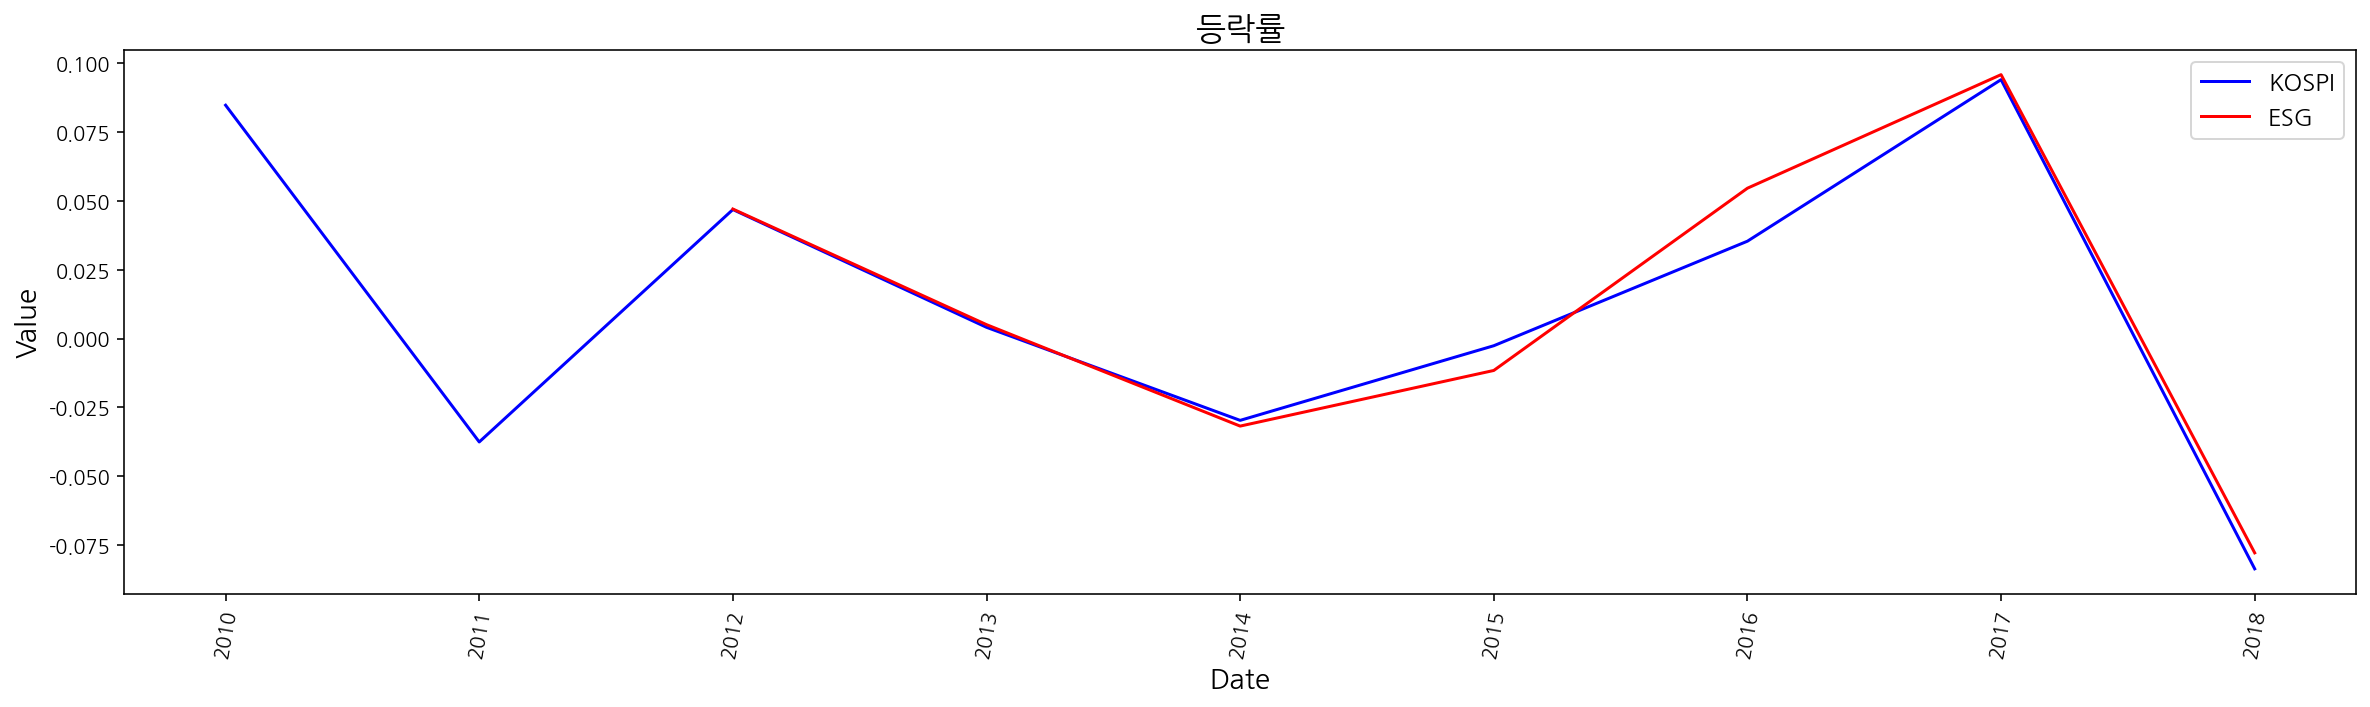

In [34]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연", y="등락률KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연", y="등락률_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('등락률', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()

### 연_월

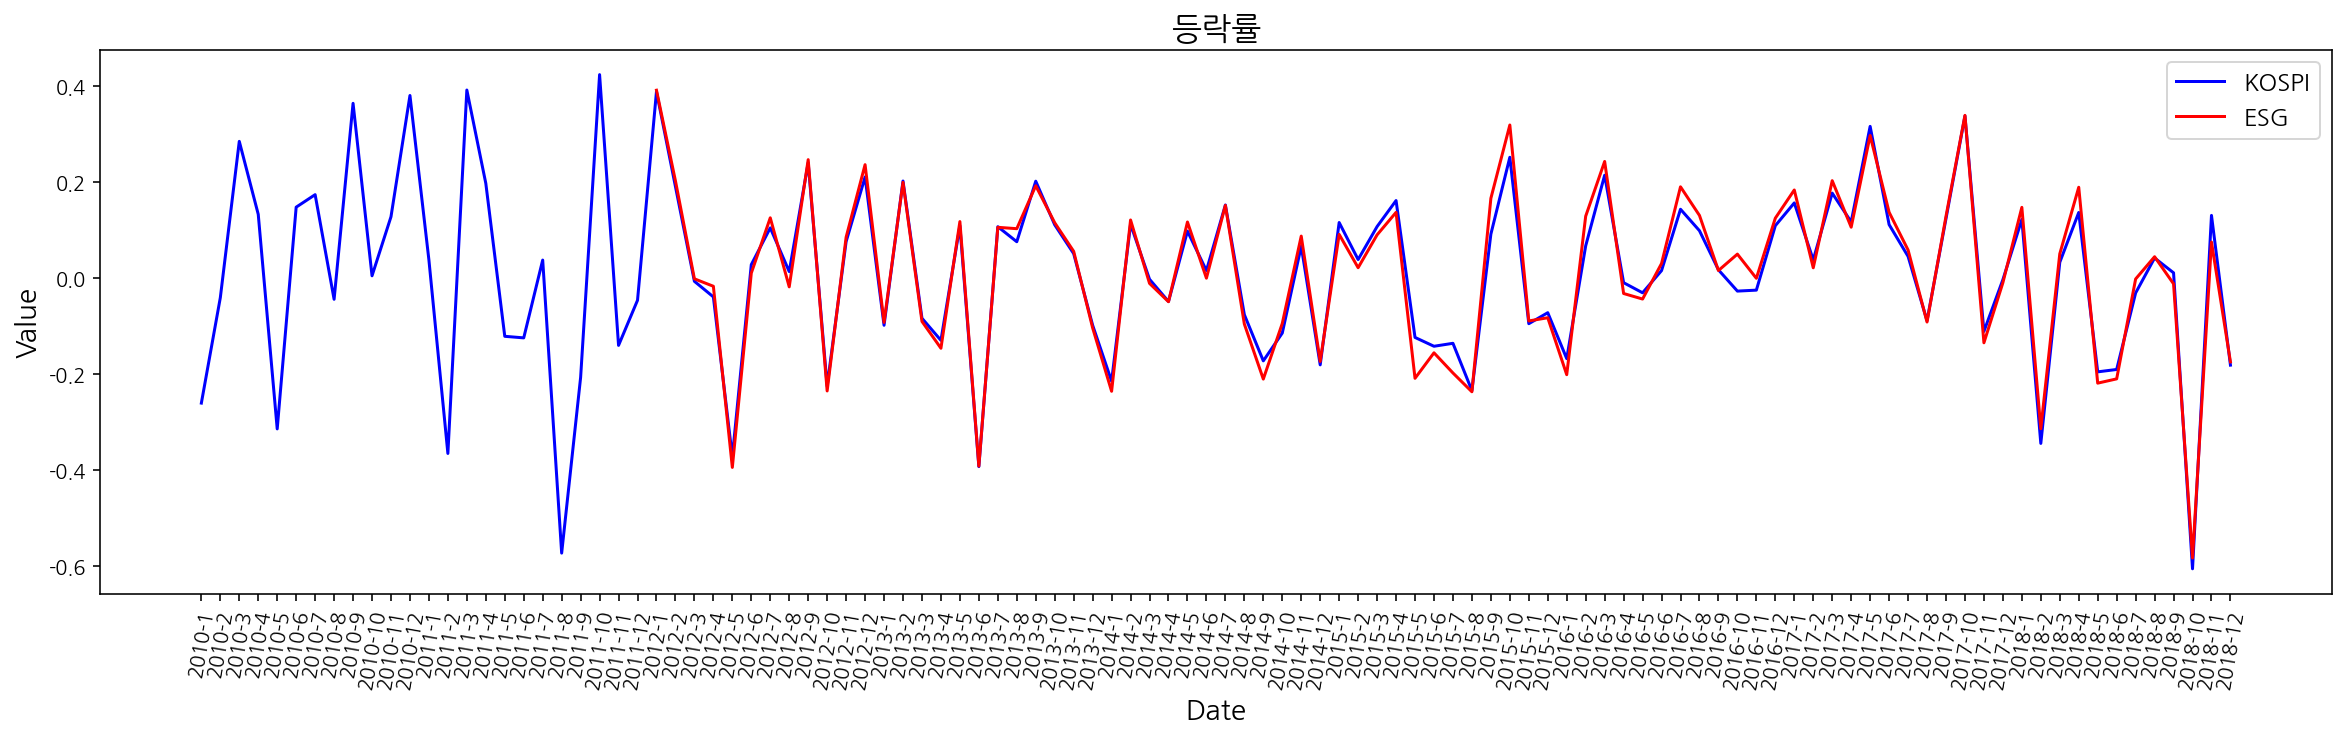

In [35]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot() 

sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="등락률KOSPI200", color='blue', ax=ax, ci=None)
sns.lineplot(data=df.sort_values("연_월_일"), x="연_월", y="등락률_KOSPI200ESG", color='red', ax=ax, ci=None)

plt.title('등락률', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=80)
plt.legend(['KOSPI', 'ESG'], fontsize=12, loc='best')
plt.show()